# Do you remember what are Accuracy, Recall, Precision and F-score? how to compute? 
Yes, Accuracy is a ratio of correctly predicted observation to the total observations. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Recall is the ratio of correctly predicted positive observations to the all observations in actual class. F1 Score is the weighted average of Precision and Recall.
Accuracy = TP+TN/TP+FP+FN+TN
Precision =  TP/TP+FP
Recall = TP/TP+FN
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# Similarity measures

In [194]:
from __future__ import  print_function
from nltk.metrics import *

In [195]:
a = "There are many similarity measures used in NLTK package".split()
b = "There are many similarity measures are available in NLTK".split()
print(a)
print(b)

['There', 'are', 'many', 'similarity', 'measures', 'used', 'in', 'NLTK', 'package']
['There', 'are', 'many', 'similarity', 'measures', 'are', 'available', 'in', 'NLTK']


In [196]:
accuracy(a,b)

0.5555555555555556

In [197]:
seta=set(a)
setb=set(b)
print(seta)
print(setb)

{'There', 'similarity', 'measures', 'package', 'used', 'are', 'many', 'NLTK', 'in'}
{'There', 'similarity', 'measures', 'available', 'are', 'many', 'NLTK', 'in'}


In [198]:
f_measure(seta,setb)

0.823529411764706

In [199]:
precision(seta,setb)

0.875

In [200]:
recall(seta,setb)

0.7777777777777778

In [201]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd


# Exercise 1: For the given sentences, apply confusion_report to get similarity between sentences. Write your code below and the outputs. 

In [202]:
confusion_matrix(a,b)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [203]:
print(classification_report(a,b))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   available       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        many       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
     package       0.00      0.00      0.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



# Can you find the overall accuracy?? What is about Recall, Precision and F-measure? 
overall accuracy = 0.56

Recall =  0.50

Precision = 0.45

F-measure = 0.47

#  plot the confusion matrix 

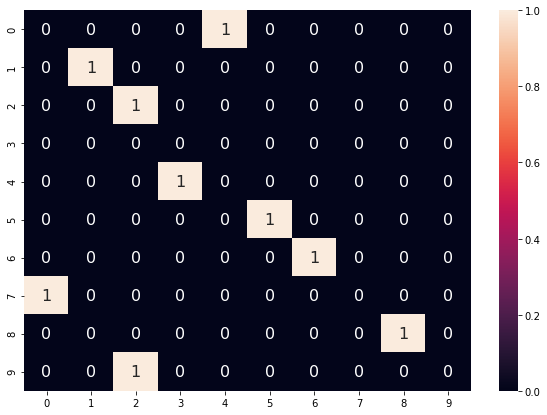

In [204]:
ar = confusion_matrix(a,b)
df_cm = pd.DataFrame(ar)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 

# Exercise 2: For the two above words “relate” and “relation”, What is the edit distance? Why? Write Steps! Calculate the edit distance between “suggestion” and “calculation”!

In [205]:
import nltk
#from nltk.metrics import *
edit_distance("relate","relation") 


3

In [206]:
edit_distance("suggestion","calculation") 

7

# Jaccard's Coefficient 

In [207]:
def jacc_similarity(query, document):
    first=set(query).intersection(set(document))
    second=set(query).union(set(document))
    return len(first)/len(second) 

In [208]:
import nltk
from nltk.metrics import *
X=set(a)
Y=set(b)
print(jaccard_distance(X,Y)) 

0.3


# Binary distance 

In [209]:
a="a"
b="a"
def binary_distance(label1, label2):
    return 0.0 if label1 == label2 else 1.0
#import nltk
#from nltk.metrics import *
X=set(a)
Y=set(b)
print(binary_distance(X, Y) )

a="a"
b="b"
X=set(a)
Y=set(b)
binary_distance(X, Y) 

0.0


1.0

# Masi distance 

In [210]:
def masi(label1, label2):
    len_intersection = len(label1.intersection(label2))
    len_union = len(label1.union(label2))
    len_label1 = len(label1)
    len_label2 = len(label2) 
    if len_label1 == len_label2 and len_label1 == len_intersection:
        m = 1
    elif len_intersection == min(len_label1, len_label2):
        m = 0.67
    elif len_intersection > 0:
        m = 0.33
    else:
        m = 0
    return 1 - (len_intersection / float(len_union)) * m
X=set([10,20,30,40])
Y=set([30,50,70])
masi(X, Y) 


0.945

# Home Task
# Exercise 3. Given a directory, demonstrate how to apply similarity measures to find similar files. 

In [211]:
fileone = open(r'C:\Users\Aziz\Desktop\fileone.txt').read().split()
filetwo = open(r'C:\Users\Aziz\Desktop\filetwo.txt').read().split()
print(fileone)
print(filetwo)

['hi', 'my', 'name', 'is', 'aziz']
['hi', 'my', 'name', 'is', 'omar']


In [212]:
setFileOne=set(open(r'C:\Users\Aziz\Desktop\fileone.txt').read().split())
setFileTwo=set(open(r'C:\Users\Aziz\Desktop\filetwo.txt').read().split())
print(setFileOne)
print(setFileTwo)

{'name', 'my', 'is', 'hi', 'aziz'}
{'name', 'my', 'is', 'hi', 'omar'}


In [213]:
accuracy(fileone,filetwo)

0.8

In [214]:
f_measure(setFileOne,setFileTwo)

0.8

In [215]:
precision(setFileOne,setFileTwo)

0.8

In [216]:
recall(setFileOne,setFileTwo)

0.8

In [217]:
confusion_matrix(fileone,filetwo)

array([[0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [218]:
classification_report(fileone,filetwo)

'              precision    recall  f1-score   support\n\n        aziz       0.00      0.00      0.00         1\n          hi       1.00      1.00      1.00         1\n          is       1.00      1.00      1.00         1\n          my       1.00      1.00      1.00         1\n        name       1.00      1.00      1.00         1\n        omar       0.00      0.00      0.00         0\n\n    accuracy                           0.80         5\n   macro avg       0.67      0.67      0.67         5\nweighted avg       0.80      0.80      0.80         5\n'

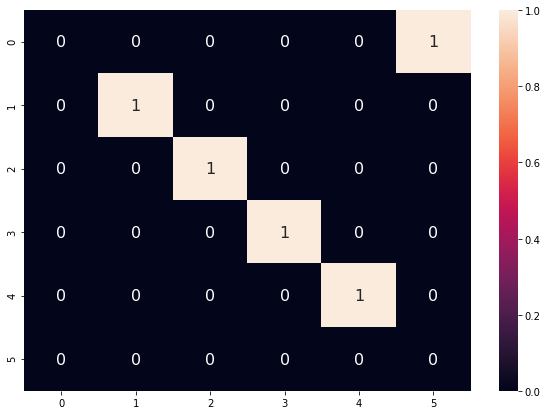

In [219]:
ar = confusion_matrix(fileone,filetwo)
df_cm = pd.DataFrame(ar)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 

In [220]:
def jacc_similarity(query, document):
    first=set(query).intersection(set(document))
    second=set(query).union(set(document))
    return len(first)/len(second) 

In [221]:
X = setFileOne
Y = setFileTwo
print(jaccard_distance(X,Y)) 

0.3333333333333333


In [222]:
def binary_distance(label1, label2):
    return 0.0 if label1 == label2 else 1.0
X = setFileOne
Y = setFileTwo
binary_distance(X, Y) 

1.0

In [223]:
def masi(label1, label2):
    len_intersection = len(label1.intersection(label2))
    len_union = len(label1.union(label2))
    len_label1 = len(label1)
    len_label2 = len(label2) 
    if len_label1 == len_label2 and len_label1 == len_intersection:
        m = 1
    elif len_intersection == min(len_label1, len_label2):
        m = 0.67
    elif len_intersection > 0:
        m = 0.33
    else:
        m = 0
    return 1 - (len_intersection / float(len_union)) * m
X = setFileOne
Y = setFileTwo
masi(X, Y) 

0.78